In [1]:
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
all_muts_df = pd.read_pickle("./data/4_6_df.pkl")
display(all_muts_df.shape)

(2537, 44)

In [3]:
all_muts_df.head()

,index,Details,mutation target annotation,Mut ID,Mutation Type,Position,Reference Seq,Sequence Change,ale,exp,flask,isolate,presence,tech_rep,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,TSS,RBS,cis-regulatory RNA,attenuator terminator,terminator,genetic,genomic features,regulators,RegulonDB Gene,mutation size,gene count,disrupt,repaired,taxonomy-id,strain-description,base-media,temperature,carbon-source,nitrogen-source,phosphorous-source,sulfur-source,supplement
0,2,R110G (CGT→GGT),clsA,NaN,SNP,1308318,NaN,G→C,1,42C,124,1,1.0,1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",[],clsA,1,1,False,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements
1,6,None,rph,NaN,DEL,3815859,NaN,Δ82 bp,1,42C,124,1,1.0,1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...",[],rph,82,1,True,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements
2,7,A734V (GCG→GTG),rpoC,NaN,SNP,4187550,NaN,C→T,1,42C,124,1,1.0,1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{ECK125239996},{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",[],rpoC,1,1,False,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements
3,8,D9A (GAT→GCT),hfq,NaN,SNP,4400313,NaN,A→C,1,42C,124,1,1.0,1,True,"(4400313, 4400313)",{ECK120000431},"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",False,False,{},{},{},{},{},{},{},True,"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...","[{'name': 'CRP', 'significantly associated con...",hfq,1,1,False,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements
4,0,coding (380‑400/1149 nt),nagA,NaN,DEL,702352,NaN,Δ21 bp,1,42C,124,1,1.0,1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...","[{'name': 'CRP', 'significantly associated con...",nagA,21,1,False,False,511145,BOP27,M9,42 celsius,glucose(4),NH4Cl(1),KH2PO4(3),MgSO4(0.24),trace elements


In [4]:
exp_mut_count_df = pd.DataFrame()
for exp, exp_mut_df in all_muts_df.groupby(["exp"]):
    exp_mut_count_df = exp_mut_count_df.append({"experiment": exp, "mutation count": len(exp_mut_df)}, ignore_index=True)
exp_mut_count_df

,experiment,mutation count
0,42C,204.0
1,C13,36.0
2,Central_carbon_knockout_PTS,31.0
3,Central_carbon_knockout_glucose_evolution,13.0
4,Central_carbon_knockout_gnd,22.0
5,Central_carbon_knockout_pgi,102.0
6,Central_carbon_knockout_sdh,19.0
7,Central_carbon_knockout_tpiA,51.0
8,GLU,591.0
9,GYD,163.0


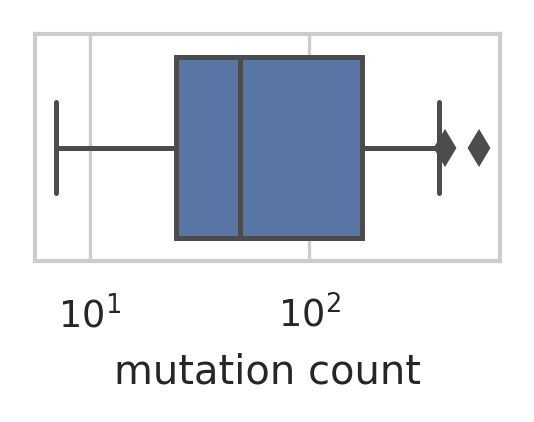

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': 'black'}
}
plt.figure(figsize=(2,1))
ax = sns.boxplot(
    data=exp_mut_count_df,
    x="mutation count"
)
ax.set_xscale('log')

These results don't really demonstrate huge mutation sets, though this is because I've done much pre-filtering. To demonstrate the potential enormity of experiments, would need to import all experiments (1) without filtered mutations (2) with hypermutators (GYD and GLU and possibly 42C)